In [1]:
import random
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

import tensorflow as tf

In [2]:
EPOCHS = 10
BATCH_SIZE = 1
IMG_SIZE = (3, 3)
IMG_SHAPE = (3, 3, 1)
LEARNING_RATE = 0.0001
RANDOM_SEED = 0

STARTED_TIMESTAMP = datetime.now().strftime("%Y%m%d-%H%M%S")

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

#tf.config.threading.set_inter_op_parallelism_threads(1)
#tf.config.threading.set_intra_op_parallelism_threads(1)

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train[(y_train == 0) | (y_train == 1)]
y_train = y_train[(y_train == 0) | (y_train == 1)]

X_test = X_test[(y_test == 0) | (y_test == 1)]
y_test = y_test[(y_test == 0) | (y_test == 1)]

X_train = np.array([resize(img, IMG_SIZE) for img in X_train])
X_test = np.array([resize(img, IMG_SIZE) for img in X_test])

In [12]:
X_train[0]

array([[0.02178649, 0.23267974, 0.12559913],
       [0.13267974, 0.28431373, 0.20261438],
       [0.12429194, 0.22287582, 0.04379085]])

2022-03-25 06:49:29.317365: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Trainable vars: 4
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3, 3, 1)]         0         
_________________________________________________________________
konvolusi (Conv2D)           (None, 2, 2, 1)           5         
_________________________________________________________________
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


2022-03-25 06:49:29.322546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-25 06:49:29.322927: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-25 06:49:29.323519: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-25 06:49:29.324643: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may hav

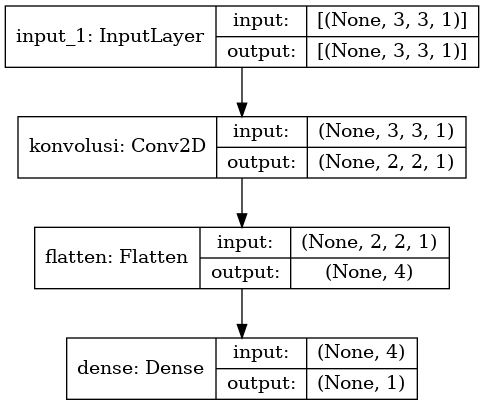

In [4]:
# create final model
input = tf.keras.layers.Input(shape=IMG_SHAPE)
x = tf.keras.layers.Conv2D(1, kernel_size=(2, 2), name="konvolusi")(input)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(input, outputs)

print("Trainable vars:", len(model.trainable_variables))

# model summary
print(model.summary())

# model structure
tf.keras.utils.plot_model(model, show_shapes=True)

In [5]:
# define optimizer and loss function
optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# compile model
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [6]:
model.fit(X_train, y_train, epochs=10)

2022-03-25 06:49:30.862774: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-03-25 06:49:31.718310: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201
2022-03-25 06:49:32.688288: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-03-25 06:49:32.728761: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-03-25 06:49:32.728824: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2022-03-25 06:49:32.771745: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-03-25 06:49:32.771852: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-03-25 06:49:33.344679: I tensorflow/stream_executor/cuda/c

396/396 [==============================] - 4s 4ms/step - loss: 0.6811 - accuracy: 0.4677
Epoch 2/10
396/396 [==============================] - 2s 4ms/step - loss: 0.6806 - accuracy: 0.4677
Epoch 3/10
396/396 [==============================] - 2s 4ms/step - loss: 0.6801 - accuracy: 0.4677
Epoch 4/10
396/396 [==============================] - 2s 4ms/step - loss: 0.6797 - accuracy: 0.4677
Epoch 5/10
396/396 [==============================] - 2s 5ms/step - loss: 0.6792 - accuracy: 0.4677
Epoch 6/10
396/396 [==============================] - 2s 5ms/step - loss: 0.6788 - accuracy: 0.4677
Epoch 7/10
396/396 [==============================] - 2s 4ms/step - loss: 0.6784 - accuracy: 0.4677
Epoch 8/10
396/396 [==============================] - 2s 4ms/step - loss: 0.6780 - accuracy: 0.4677
Epoch 9/10
396/396 [==============================] - 2s 4ms/step - loss: 0.6776 - accuracy: 0.4677
Epoch 10/10
396/396 [==============================] - 2s 4ms/step - loss: 0.6772 - accuracy: 0.4677


In [18]:
model.trainable_variables

[<tf.Variable 'konvolusi/kernel:0' shape=(2, 2, 1, 1) dtype=float32, numpy=
 array([[[[-0.3650981 ]],
 
         [[-0.51215166]]],
 
 
        [[[ 0.05020783]],
 
         [[ 0.10830074]]]], dtype=float32)>,
 <tf.Variable 'konvolusi/bias:0' shape=(1,) dtype=float32, numpy=array([0.02604059], dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[ 0.12507343],
        [-0.6071307 ],
        [ 0.80183226],
        [ 0.61323184]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.02815864], dtype=float32)>]

In [16]:
model.weights[1].numpy().squeeze()

array(0.02604059, dtype=float32)

In [8]:
pred_img = X_test[0]
pred_img = np.expand_dims(pred_img, axis=0)

# predict
predicted = tf.nn.sigmoid(model.predict(pred_img))
predicted = tf.argmax(predicted, axis=1)

In [9]:
# First, we create a model that maps the input image to the activations
# of the last conv layer as well as the output predictions
convLayer = model.get_layer("konvolusi").output
grad_model = tf.keras.models.Model(
    [model.inputs], [convLayer, model.output]
)

# Then, we compute the gradient of the top predicted class for our input image
# with respect to the activations of the last conv layer
with tf.GradientTape() as tape:
    last_conv_layer_logits, prediction_logits = grad_model(pred_img)
    pred_index = tf.argmax(prediction_logits[0])
    loss_value = prediction_logits[:, pred_index]

    print("prediction_logits", prediction_logits.shape)
    print("prediction_logits", prediction_logits)
    print("")
    print("last_conv_layer_logits", last_conv_layer_logits.shape)
    print("last_conv_layer_logits", last_conv_layer_logits)
    print("")
    print("pred_index", pred_index)
    print("")
    print("loss_value", loss_value.shape)
    print("loss_value", loss_value)
    print("")

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(loss_value, last_conv_layer_logits)
    print("grads", grads.shape)
    print("grads", grads)
    print("")

# This is a vector where each entry is the mean intensity of the gradient
# over a specific feature map channel
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
print("pooled_grads", pooled_grads.shape)
print("pooled_grads", pooled_grads[:10])
print("")

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the top predicted class
# then sum all the channels to obtain the heatmap class activation
heatmap = tf.matmul(last_conv_layer_logits[0], pooled_grads[..., tf.newaxis])
print("heatmap matmul", heatmap.shape)
print("heatmap matmul", heatmap)
print("")

heatmap = tf.squeeze(heatmap)
print("heatmap squeeze", heatmap.shape)
print("heatmap squeeze", heatmap)
print("")

# For visualization purpose, we will also normalize the heatmap between 0 & 1
heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
print("heatmap max", heatmap.shape)
print("heatmap max", heatmap)
print("")

prediction_logits (1, 1)
prediction_logits tf.Tensor([[-0.0374317]], shape=(1, 1), dtype=float32)

last_conv_layer_logits (1, 2, 2, 1)
last_conv_layer_logits tf.Tensor(
[[[[ 0.00774982]
   [-0.0028427 ]]

  [[-0.05277416]
   [-0.04234859]]]], shape=(1, 2, 2, 1), dtype=float32)

pred_index tf.Tensor(0, shape=(), dtype=int64)

loss_value (1,)
loss_value tf.Tensor([-0.0374317], shape=(1,), dtype=float32)

grads (1, 2, 2, 1)
grads tf.Tensor(
[[[[ 0.12507343]
   [-0.6071307 ]]

  [[ 0.80183226]
   [ 0.61323184]]]], shape=(1, 2, 2, 1), dtype=float32)

pooled_grads (1,)
pooled_grads tf.Tensor([0.2332517], shape=(1,), dtype=float32)

heatmap matmul (2, 2, 1)
heatmap matmul tf.Tensor(
[[[ 0.00180766]
  [-0.00066306]]

 [[-0.01230966]
  [-0.00987788]]], shape=(2, 2, 1), dtype=float32)

heatmap squeeze (2, 2)
heatmap squeeze tf.Tensor(
[[ 0.00180766 -0.00066306]
 [-0.01230966 -0.00987788]], shape=(2, 2), dtype=float32)

heatmap max (2, 2)
heatmap max tf.Tensor(
[[1. 0.]
 [0. 0.]], shape=(2, 2), d

In [10]:
# Rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# Use RGB values of the colormap
nipy_cm = plt.cm.get_cmap("nipy_spectral")
nipy_colors = nipy_cm(np.arange(256))[:, :3]
cm_heatmap = nipy_colors[heatmap]

# load original image
original_img = tf.keras.preprocessing.image.load_img(img_path)
original_img = tf.keras.preprocessing.image.img_to_array(original_img)

# Create an image with RGB colorized heatmap
cm_heatmap = tf.keras.preprocessing.image.array_to_img(cm_heatmap)
cm_heatmap = cm_heatmap.resize((original_img.shape[1], original_img.shape[0]))
cm_heatmap = tf.keras.preprocessing.image.img_to_array(cm_heatmap)

# Superimpose the heatmap on original image
superimposed_img = cm_heatmap * alpha + original_img
superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
plt.imshow(superimposed_img)

NameError: name 'img_path' is not defined

## MATH PLAYGROUND

In [80]:
img1 = np.array([[
  [[0.0217], [0.2326], [0.1255]],
  [[0.1326], [0.2843], [0.2026]],
  [[0.1242], [0.2228], [0.0437]]
]], dtype=np.float32)
A = tf.Variable(img1, name='input')
y = tf.Variable(0.0, name='output')

kernel1 = np.array([
  [ [[-0.3650, -0.5121]] ],
  [ [[-0.0502, 0.1083]] ]
], dtype=np.float32)
weights_kernel1 = tf.Variable(kernel1, name='weights_kernel1')
bias1 = tf.Variable(0.0260, name='bias1')

weights2 = tf.Variable(np.array([[0.1251, -0.6071, 0.8018, 0.6132]], dtype=np.float32), name='weights2')
bias2 = tf.Variable(0.0282, name='bias2')


with tf.GradientTape(persistent=True) as tape:
  y1 = bias1 + tf.nn.conv2d(A, weights_kernel1, strides=[1, 1, 1, 1], padding='VALID')
  y2 = tf.nn.sigmoid(bias2 + tf.transpose(y1) @ weights2)

  loss = tf.reduce_sum(tf.square(y2 - y))

gradients = tape.gradient(loss, [weights_kernel1, bias1, weights2, bias2])
print(gradients)

[<tf.Tensor: shape=(2, 1, 1, 2), dtype=float32, numpy=
array([[[[0.22600816, 0.22567947]]],


       [[[0.23011062, 0.23109803]]]], dtype=float32)>, <tf.Tensor: shape=(), dtype=float32, numpy=2.7505274>, <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.12762746, -0.13092825, -0.1244053 , -0.12531886]],
      dtype=float32)>, <tf.Tensor: shape=(), dtype=float32, numpy=12.106045>]


In [75]:
import numpy as np
from scipy.signal import convolve2d, correlate2d

np.random.seed(42)

In [101]:
def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def binary_cross_entropy(y_true, y_pred):
    return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

In [106]:
learning_rate = 0.001
y = 0.0
A = np.array([
  [0.02178649, 0.23267974, 0.12559913],
  [0.13267974, 0.28431373, 0.20261438],
  [0.12429194, 0.22287582, 0.04379085]
])

In [77]:
# CNN - Layer 1, single filter, single bias, forward propagation
cnn_b = np.random.uniform(0, 1, size=(2, 2))
cnn_k = np.random.uniform(0, 1, size=(2, 2))

conv1 = correlate2d(A, cnn_b, mode='valid')
conv1_b = cnn_b + conv1

print("Bias\n", cnn_b)
print("Kernel\n", cnn_k)
print("Convolution\n", conv1)
print("Convolution with Bias\n", conv1_b)

Bias
 [[0.37454012 0.95071431]
 [0.73199394 0.59865848]]
Kernel
 [[0.15601864 0.15599452]
 [0.05808361 0.86617615]]
Convolution
 [[0.49669946 0.53596953]
 [0.54440246 0.4884748 ]]
Convolution with Bias
 [[0.87123958 1.48668384]
 [1.27639641 1.08713329]]


In [83]:
# FCN - Layer 2, single weight, single bias, forward propagation
fcn_b = np.random.uniform(0, 1, (4, 1))
fcn_w = np.random.uniform(0, 1, (4, 4))

fcn1 = np.matmul(fcn_w, conv1_b.reshape(-1, 1))
fcn1_b = fcn_b + fcn1

print("Bias\n", fcn_b)
print("Weight\n", fcn_w)
print("Forward pass\n", fcn1)
print("Forward pass with Bias\n", fcn1_b)

Bias
 [[0.9093204 ]
 [0.25877998]
 [0.66252228]
 [0.31171108]]
Weight
 [[0.52006802 0.54671028 0.18485446 0.96958463]
 [0.77513282 0.93949894 0.89482735 0.59789998]
 [0.92187424 0.0884925  0.19598286 0.04522729]
 [0.32533033 0.38867729 0.27134903 0.82873751]]
Forward pass
 [[2.55590447]
 [3.86421567]
 [1.23405361]
 [2.10857797]]
Forward pass with Bias
 [[3.46522487]
 [4.12299566]
 [1.89657589]
 [2.42028904]]


In [99]:
# FCN - Layer 3, single weight, single bias, forward propagation
fcn2_b = np.random.uniform(0, 1, (1, 1))
fcn2_w = np.random.uniform(0, 1, (4, 1))

fcn2 = np.matmul(fcn2_w.T, fcn1_b.reshape(-1, 1))
fcn2_b = fcn2_b + fcn2

fcn2_out = sigmoid(fcn2_b)

print("Bias\n", fcn_b)
print("Weight\n", fcn_w)
print("Forward pass\n", fcn2)
print("Forward pass with Bias\n", fcn2_b)
print("Output sigmoid", fcn2_out)

Bias
 [[0.9093204 ]
 [0.25877998]
 [0.66252228]
 [0.31171108]]
Weight
 [[0.52006802 0.54671028 0.18485446 0.96958463]
 [0.77513282 0.93949894 0.89482735 0.59789998]
 [0.92187424 0.0884925  0.19598286 0.04522729]
 [0.32533033 0.38867729 0.27134903 0.82873751]]
Forward pass
 [[5.34517995]]
Forward pass with Bias
 [[5.4087383]]
Output sigmoid [[0.99554267]]


In [105]:
# Empirical loss
binary_cross_entropy(y, fcn2_out)

[[224.34961016]]


In [108]:
# FCN - Layer 3, single weight, single bias, back propagation
output_gradient = binary_cross_entropy_prime(y, fcn2_out)
weights_gradient = np.dot(output_gradient, fcn1_b.reshape(-1, 1).T)
fcn2_b_grads = np.dot(fcn2_w, output_gradient)

fcn2_w -= learning_rate * weights_gradient
fcn2_b -= learning_rate * output_gradient

ValueError: non-broadcastable output operand with shape (4,1) doesn't match the broadcast shape (4,4)

### MANUAL

In [112]:
a = np.array([
  [0.361, 0.518],
  [0.050, 0.108]
])
b = np.array([
  [0.02178649, 0.23267974, 0.12559913],
  [0.13267974, 0.28431373, 0.20261438],
  [0.12429194, 0.22287582, 0.04379085]
])

ff1 = correlate2d(b, a, mode='valid')
ff1

array([[0.1657329 , 0.18515578],
       [0.22545708, 0.22346471]])

In [113]:
conv1_bias = np.array([
  [0.361, 0.518],
  [0.050, 0.108]
])

ff1 + conv1_bias

array([[0.5267329 , 0.70315578],
       [0.27545708, 0.33146471]])